In [9]:
import xarray as xr # Import the Xarray package
import matplotlib.pyplot as plt # Plotting library
import numpy as np # Import the Numpy package
import cartopy,cartopy.crs as ccrs # Plot maps
import cartopy.feature as cfeature # Collection of points, lines and polygons
from cartopy.mpl.gridliner import LATITUDE_FORMATTER, LONGITUDE_FORMATTER # Add gridlines and tick labels to a map
import cartopy.io.shapereader as shpreader # Oriented shapefile reader
from netCDF4 import Dataset # Read/Write NetCDF4 files
from datetime import datetime, timedelta # Basics Dates and time types
from matplotlib import cm # Colormap handling utilities
import metpy
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
%matplotlib inline
from mpl_toolkits.basemap import Basemap
from utilities import loadCPT
from scipy.ndimage.filters import maximum_filter, minimum_filter
import scipy.ndimage as ndimage
from ecmwf.opendata import Client

In [10]:
def plot_maxmin_points_0(lon, lat, data, extrema, nsize, symbol, color='k',
                       plotValue=True, transform=None):
    
    from scipy.ndimage.filters import maximum_filter, minimum_filter

    if (extrema == 'max'):
        data_ext = maximum_filter(data, nsize, mode='nearest')
    elif (extrema == 'min'):
        data_ext = minimum_filter(data, nsize, mode='nearest')
    else:
        raise ValueError('Value for hilo must be either max or min')

    mxy, mxx = np.where(data_ext == data)

    for i in range(len(mxy)):

        txt2 = ax.annotate('\n' + str(int(data[mxy[i], mxx[i]])), xy=(lon[mxy[i], mxx[i]], lat[mxy[i], mxx[i]]),
                           xycoords=ccrs.PlateCarree()._as_mpl_transform(ax), 
                color=color, size=14, clip_on=True, annotation_clip=True, fontweight='bold', 
                           horizontalalignment='center', verticalalignment='top',
                transform=ccrs.PlateCarree())  

In [11]:
ds13=xr.open_dataset('C:/Users/igorr/Downloads/OR_ABI-L2-CMIPF-M6C13_G16_s20233191240206_e20233191249526_c20233191249590.nc')
ds13

<xarray.Dataset>
Dimensions:                                           (y: 5424, x: 5424, number_of_time_bounds: 2, number_of_image_bounds: 2, band: 1)
Coordinates:
    t                                                 datetime64[ns] ...
  * y                                                 (y) float32 0.1518 ... ...
  * x                                                 (x) float32 -0.1518 ......
    y_image                                           float32 ...
    x_image                                           float32 ...
    band_wavelength                                   (band) float32 ...
    band_id                                           (band) int32 ...
Dimensions without coordinates: number_of_time_bounds, number_of_image_bounds, band
Data variables: (12/35)
    CMI                                               (y, x) float32 ...
    DQF                                               (y, x) float32 ...
    time_bounds                                       (number_of_time_bounds) datetime64[ns] ...
    goes_imager_projection                            int32 ...
    y_image_bounds                                    (number_of_image_bounds) float32 ...
    x_image_bounds                                    (number_of_image_bounds) float32 ...
    ...                                                ...
    focal_plane_temperature_threshold_exceeded_count  float64 ...
    maximum_focal_plane_temperature                   float32 ...
    focal_plane_temperature_threshold_increasing      float32 ...
    focal_plane_temperature_threshold_decreasing      float32 ...
    channel_integration_time                          float64 ...
    channel_gain_field                                float64 ...
Attributes: (12/29)
    naming_authority:          gov.nesdis.noaa
    Conventions:               CF-1.7
    Metadata_Conventions:      Unidata Dataset Discovery v1.0
    standard_name_vocabulary:  CF Standard Name Table (v35, 20 July 2016)
    institution:               DOC/NOAA/NESDIS > U.S. Department of Commerce,...
    project:                   GOES
    ...                        ...
    cdm_data_type:             Image
    time_coverage_start:       2023-11-15T12:40:20.6Z
    time_coverage_end:         2023-11-15T12:49:52.6Z
    timeline_id:               ABI Mode 6
    production_data_source:    Realtime
    id:                        657bd807-a37c-43c7-98a0-01cf2b89b432

In [12]:
dat13 = ds13.metpy.parse_cf('CMI')
dat13=dat13-273.15
geos = dat13.metpy.cartopy_crs

x = dat13.x
y = dat13.y

In [13]:
# Scan's start time, converted to datetime object
scan_start = datetime.strptime(ds13.time_coverage_start, '%Y-%m-%dT%H:%M:%S.%fZ')
date=scan_start
# Scan's end time, converted to datetime object
scan_end = datetime.strptime(ds13.time_coverage_end, '%Y-%m-%dT%H:%M:%S.%fZ')

# File creation time, convert to datetime object
file_created = datetime.strptime(ds13.date_created, '%Y-%m-%dT%H:%M:%S.%fZ')

# The 't' variable is the scan's midpoint time
midpoint = str(ds13['t'].data)[:-8]
scan_mid = datetime.strptime(midpoint, '%Y-%m-%dT%H:%M:%S.%f')

print('Scan Start    : {}'.format(scan_start))
print('Scan midpoint : {}'.format(scan_mid))
print('Scan End      : {}'.format(scan_end))
print('File Created  : {}'.format(file_created))
print('Scan Duration : {:.2f} minutes'.format((scan_end-scan_start).seconds/60))

Scan Start    : 2023-11-15 12:40:20.600000
Scan midpoint : 2023-11-15 12:45:06.600000
Scan End      : 2023-11-15 12:49:52.600000
File Created  : 2023-11-15 12:49:59
Scan Duration : 9.53 minutes


In [14]:
cpt=loadCPT('IR4AVHRR6.cpt')
my_cmap=cm.colors.LinearSegmentedColormap('cpt',cpt)
vmin=-103.15
vmax=106.85

In [15]:
x,y=np.meshgrid(dat13.x,dat13.y)

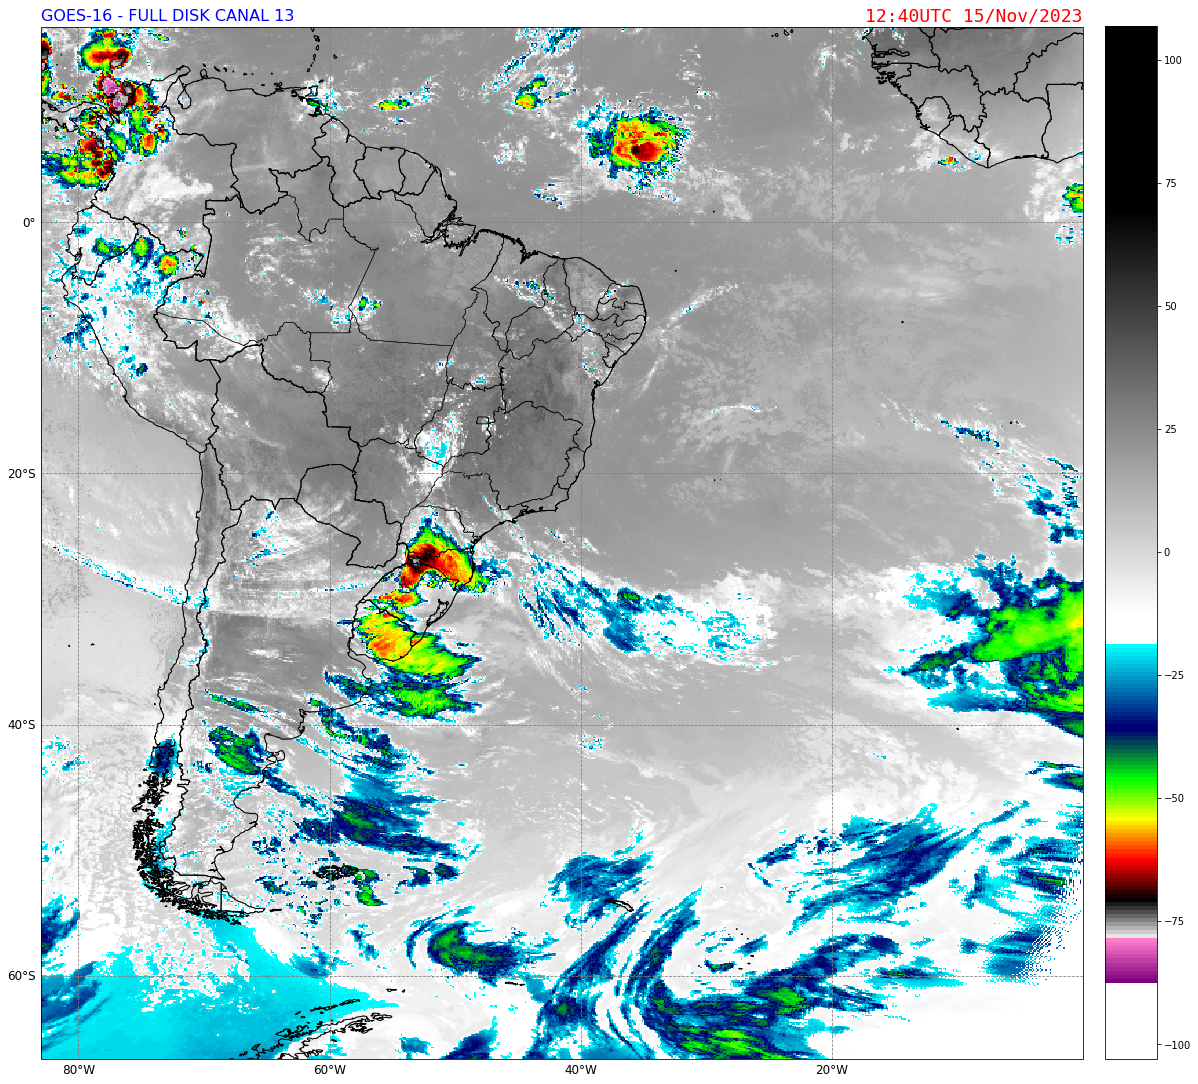

In [21]:
fig = plt.figure(figsize=(20, 20))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution="10m",edgecolor='k',linestyle='-',linewidth=0.3)
#ax.set_extent([-83,-34,12,-54])
#ax.set_extent([-58,-47,-34,-22])
ax.set_extent([-83,0,12,-60])
#ax.set_extent([-105,-95,21,14])
##ax.set_extent([-54.8,-47.9,-22.4,-26.8])
##ax.set_extent([-58, -48, -22, -34])
im=ax.imshow(dat13,#cmap='gray_r',
             cmap=my_cmap,
             vmin=vmin,vmax=vmax,
             origin='upper',
             extent=(x.min(), x.max(), y.min(), y.max()),
             transform=geos,
             interpolation='none')

#plot_maxmin_points_0(x,y,dat13,'min',10,symbol='mín',
#                   color='k',
#                   transform=ccrs.PlateCarree())

states = list(shpreader.Reader
              ('C:/Users/igorr/OneDrive/Área de Trabalho/MAPAS/10/ne_10m_admin_0_countries.shp').geometries())
ax.add_geometries(states, ccrs.PlateCarree(), edgecolor='k',facecolor='none',linestyle='-',linewidth=1.)
states = list(shpreader.Reader
              ('C:/Users/igorr/OneDrive/Área de Trabalho/MAPAS/BR/BR_UF_2022.shp').geometries())
ax.add_geometries(states, ccrs.PlateCarree(), edgecolor='k',facecolor='none',linestyle='-',linewidth=0.5)

g1=ax.gridlines(crs=ccrs.PlateCarree(),linestyle='--',color='gray',draw_labels=True)
g1.right_labels=False
g1.top_labels=False
g1.yformatter=LATITUDE_FORMATTER
g1.xformatter=LONGITUDE_FORMATTER
g1.ylabel_style={'size':12,'color':'black'}
g1.xlabel_style={'size':12,'color':'black'}
cbar=plt.colorbar(im,ax=ax,pad=0.02,fraction=0.0463,orientation='vertical')
#cbar=plt.colorbar(im,ax=ax,pad=0.02,fraction=0.049,orientation='vertical')
#cbar=plt.colorbar(im,ax=ax,pad=0.02,fraction=0.043,orientation='horizontal')
#cbar=plt.colorbar(im,ax=ax,pad=0.02,fraction=0.0332,orientation='vertical')
##cbar=plt.colorbar(im,ax=ax,pad=0.02,fraction=0.0305,orientation='vertical')
plt.title('GOES-16 - FULL DISK CANAL 13',
          fontsize=16,loc='left',color='blue')
#plt.title('{}'.format(scan_start.strftime('%d %B %Y %H:%M UTC')),fontsize=18,loc='right',
#          color='blue',fontweight='normal',fontfamily='monospace')
plt.title('{}'.format(scan_start.strftime('%H:%MUTC %d/%b/%Y')),fontsize=18,loc='right',
          color='red',fontweight='normal',fontfamily='monospace')
plt.savefig('GOES16_CH13_INFRA_AS_'+scan_start.strftime('%H_%MUTC_%d_%b_%Y')+'.jpeg',dpi=300,bbox_inches='tight')

In [44]:
ds13=xr.open_dataset('C:/Users/igorr/Downloads/OR_ABI-L1b-RadF-M6C13_G16_s20232341300205_e20232341309524_c20232341309575.nc')
ds13

<xarray.Dataset>
Dimensions:                                           (y: 5424, x: 5424, number_of_time_bounds: 2, number_of_image_bounds: 2, band: 1, number_of_harmonization_coefficients: 3, num_star_looks: 24)
Coordinates:
    t                                                 datetime64[ns] ...
  * y                                                 (y) float32 0.1518 ... ...
  * x                                                 (x) float32 -0.1518 ......
    y_image                                           float32 ...
    x_image                                           float32 ...
    band_id                                           (band) int8 ...
    band_wavelength                                   (band) float32 ...
    t_star_look                                       (num_star_looks) datetime64[ns] ...
    band_wavelength_star_look                         (num_star_looks) float32 ...
Dimensions without coordinates: number_of_time_bounds, number_of_image_bounds, band, number_of_harmonization_coefficients, num_star_looks
Data variables: (12/39)
    Rad                                               (y, x) float32 ...
    DQF                                               (y, x) float32 ...
    time_bounds                                       (number_of_time_bounds) datetime64[ns] ...
    goes_imager_projection                            int32 ...
    y_image_bounds                                    (number_of_image_bounds) float32 ...
    x_image_bounds                                    (number_of_image_bounds) float32 ...
    ...                                                ...
    algorithm_dynamic_input_data_container            int32 ...
    processing_parm_version_container                 int32 ...
    algorithm_product_version_container               int32 ...
    star_id                                           (num_star_looks) float32 ...
    channel_integration_time                          float64 ...
    channel_gain_field                                float64 ...
Attributes: (12/30)
    naming_authority:          gov.nesdis.noaa
    Conventions:               CF-1.7
    standard_name_vocabulary:  CF Standard Name Table (v35, 20 July 2016)
    institution:               DOC/NOAA/NESDIS > U.S. Department of Commerce,...
    project:                   GOES
    production_site:           WCDAS
    ...                        ...
    timeline_id:               ABI Mode 6
    date_created:              2023-08-22T13:09:57.5Z
    time_coverage_start:       2023-08-22T13:00:20.5Z
    time_coverage_end:         2023-08-22T13:09:52.4Z
    LUT_Filenames:             SpaceLookParams(FM1A_ADR1270_PR_12_02_01)-7387...
    id:                        52266974-5751-4348-a51c-e0d3c2c00e71

In [45]:
dat13 = ds13.metpy.parse_cf('Rad')
dat13=dat13-273.15
geos = dat13.metpy.cartopy_crs

x = dat13.x
y = dat13.y

In [46]:
# Scan's start time, converted to datetime object
scan_start = datetime.strptime(ds13.time_coverage_start, '%Y-%m-%dT%H:%M:%S.%fZ')
date=scan_start
# Scan's end time, converted to datetime object
scan_end = datetime.strptime(ds13.time_coverage_end, '%Y-%m-%dT%H:%M:%S.%fZ')

# File creation time, convert to datetime object
file_created = datetime.strptime(ds13.date_created, '%Y-%m-%dT%H:%M:%S.%fZ')

# The 't' variable is the scan's midpoint time
midpoint = str(ds13['t'].data)[:-8]
scan_mid = datetime.strptime(midpoint, '%Y-%m-%dT%H:%M:%S.%f')

print('Scan Start    : {}'.format(scan_start))
print('Scan midpoint : {}'.format(scan_mid))
print('Scan End      : {}'.format(scan_end))
print('File Created  : {}'.format(file_created))
print('Scan Duration : {:.2f} minutes'.format((scan_end-scan_start).seconds/60))

Scan Start    : 2023-08-22 13:00:20.500000
Scan midpoint : 2023-08-22 13:05:06.500000
Scan End      : 2023-08-22 13:09:52.400000
File Created  : 2023-08-22 13:09:57.500000
Scan Duration : 9.52 minutes


In [57]:
vmin=-250
vmax=-180

Text(1.0, 1.0, '22 August 2023 13:00 UTC')

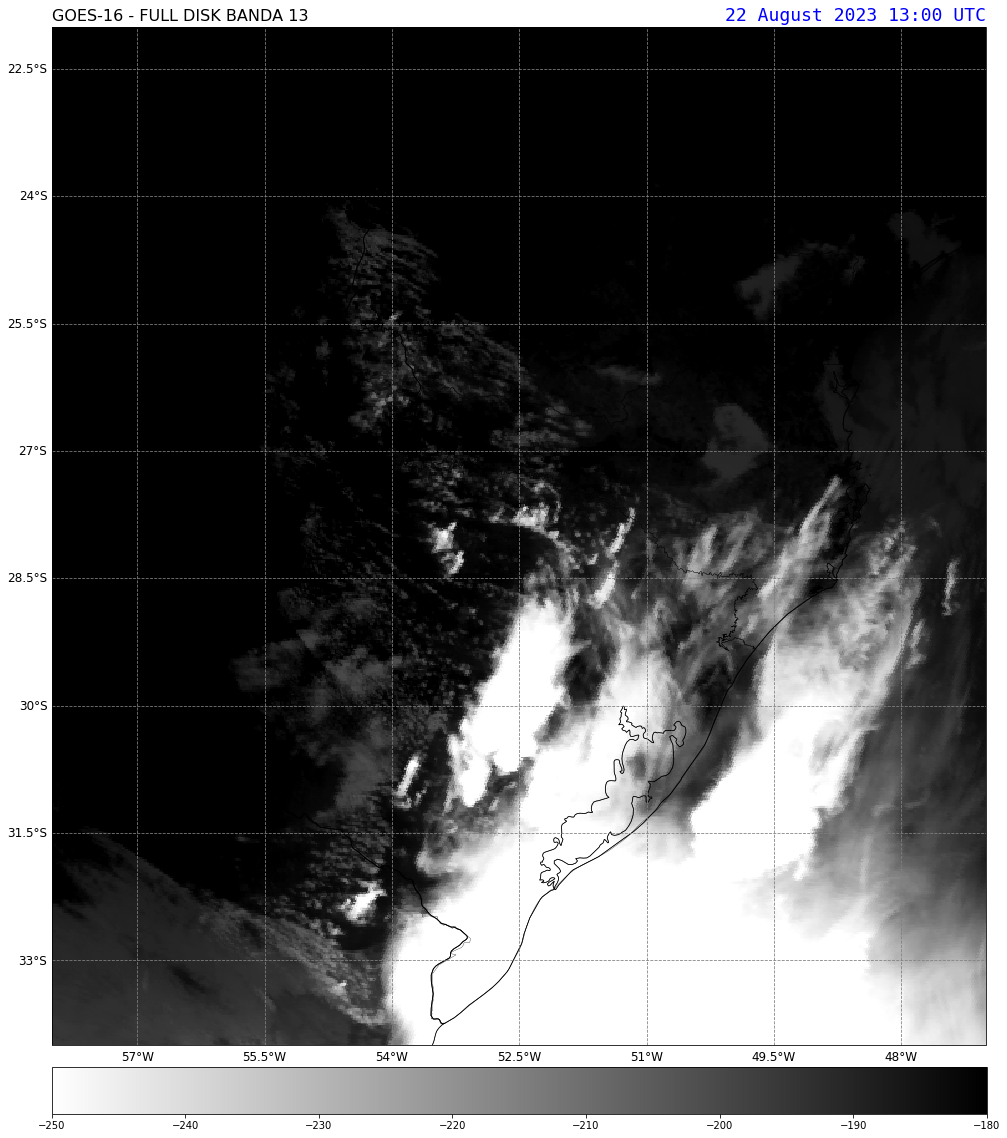

In [58]:
fig = plt.figure(figsize=(20, 20))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution="10m",edgecolor='k',linestyle='-',linewidth=0.3)
#ax.set_extent([-83,-34,12,-54])
ax.set_extent([-58,-47,-34,-22])

im=ax.imshow(dat13,cmap='gray_r',
             #cmap=my_cmap,
             vmin=vmin,vmax=vmax,
             origin='upper',
             extent=(x.min(), x.max(), y.min(), y.max()),
             transform=geos,
             interpolation='none')

states = list(shpreader.Reader
              ('C:/Users/igorr/OneDrive/Área de Trabalho/MAPAS/10/ne_10m_admin_0_countries.shp').geometries())
ax.add_geometries(states, ccrs.PlateCarree(), edgecolor='k',facecolor='none',linestyle='-',linewidth=0.8)
states = list(shpreader.Reader
              ('C:/Users/igorr/OneDrive/Área de Trabalho/MAPAS/BR/BR_UF_2022.shp').geometries())
ax.add_geometries(states, ccrs.PlateCarree(), edgecolor='k',facecolor='none',linestyle='-',linewidth=0.3)

g1=ax.gridlines(crs=ccrs.PlateCarree(),linestyle='--',color='gray',draw_labels=True)
g1.right_labels=False
g1.top_labels=False
g1.yformatter=LATITUDE_FORMATTER
g1.xformatter=LONGITUDE_FORMATTER
g1.ylabel_style={'size':12,'color':'black'}
g1.xlabel_style={'size':12,'color':'black'}

#cbar=plt.colorbar(im,ax=ax,pad=0.02,fraction=0.049,orientation='vertical')
cbar=plt.colorbar(im,ax=ax,pad=0.02,fraction=0.043,orientation='horizontal')
plt.title('GOES-16 - FULL DISK BANDA 13',
          fontsize=16,loc='left')
plt.title('{}'.format(scan_start.strftime('%d %B %Y %H:%M UTC')),fontsize=18,loc='right',
          color='blue',fontweight='normal',fontfamily='monospace')
#plt.savefig('banda13.jpeg',dpi=300,bbox_inches='tight')

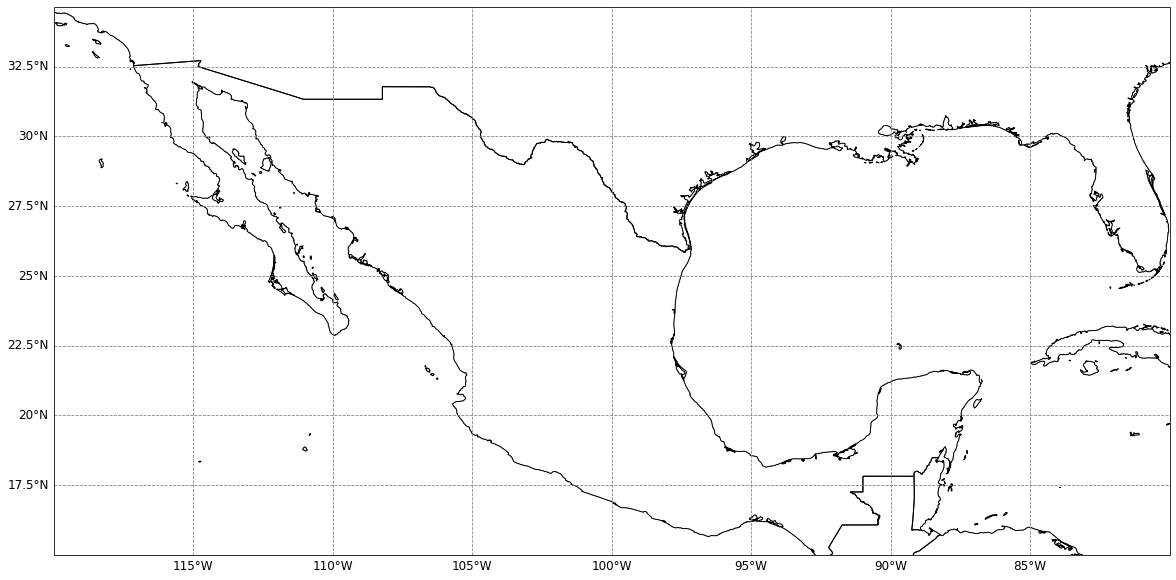

In [30]:
fig = plt.figure(figsize=(20, 20))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution="10m",edgecolor='k',linestyle='-',linewidth=0.3)
#ax.set_extent([-83,-34,12,-54])
#ax.set_extent([-58,-47,-34,-22])
#ax.set_extent([-83,0,12,-60])
ax.set_extent([-120,-80,33,15])
g1=ax.gridlines(crs=ccrs.PlateCarree(),linestyle='--',color='gray',draw_labels=True)
g1.right_labels=False
g1.top_labels=False
g1.yformatter=LATITUDE_FORMATTER
g1.xformatter=LONGITUDE_FORMATTER
g1.ylabel_style={'size':12,'color':'black'}
g1.xlabel_style={'size':12,'color':'black'}

states = list(shpreader.Reader
              ('C:/Users/igorr/OneDrive/Área de Trabalho/MAPAS/10/ne_10m_admin_0_countries.shp').geometries())
ax.add_geometries(states, ccrs.PlateCarree(), edgecolor='k',facecolor='none',linestyle='-',linewidth=1.)